# Research Project Challenge

- Name: Congxin (David) Xu
- Date: 2020-11-08

## Description

Our research partners are in need of our help to analyze `NIH All of Us COPE` survey data. They are about to launch a new survey and want "to anticipate, based on previous survey results, places where we might expect issues or challenges when we launch the new survey". Specific items like: response counts, skip rates, and response frequency distribution for each question should be included along with any other metrics you can think of that will help the researchers identify questions that are potentially problematic (e.g, low response rates, no variability). If they identify questions (or wording of questions) that don't provide much information they will be able to update/modify the questions on the new survey to help get better information.

One challenge is that due to privacy reasons they can't give us access the data. So we will have to make do with the attached codebook and simulated survey response data.

Tasks:

1) Use the attached codebook to generate synthetic response data. Add some categorical demographic attributes (e.g., racial identity, gender identity, age category).

    a) All the questions in the attached codebook should be included. The responses don't have to be realistic. Our research partners will replace your synthetic data with their real data and re-run your notebook. But do be sure to include values that correspond to non-responses.

    b) Attach a separate script that generates the synthetic data. I would expect the actual data will be a csv file with one row per respondent and one column per question plus columns for user id and demographic information.

 

2) Create a Jupyter Notebook that performs the operational analysis for each question.

    a) Make it clear what type of input data is expected so our research partners can easily use their actual data in place of your synthetic data.
    
    b) There should be an analysis for each question, and possibly for each question group (if it makes sense).
    
    c) Provide a way for our partners to stratify these metrics across various demographic categories, for instance skip rates by racial identity.

 

3) Notes that briefly describe the parts of the notebook that need improving if you were given more time.

 

 

Data sources:

 

https://www.nlm.nih.gov/dr2/COPE_Survey_NIH_All_of_Us_Clean_4.27.20.pdf

Screenshots of the main path from May and June COPE screens: https://sites.google.com/view/user-journeys-aou-portal/consents/cope-survey

 

In the codebook, 
- look particularly at the “type” column to identify which rows represent questions, and which are answers, and 
- PMI Code will tell you what the question will be named in the database. 
- For questions, you can see the “answer type” column to know what sort of response to expect. 
- For answers, the parent code shows you what question(s) this response belongs to.

 

Note: similar to most "real-world" problems, the assignment is rather vague and you have limited time to complete it. We are looking for easy to follow code and informative analytics; anticipate that our partners will have to tweak your code in some places. We will select the top few submissions and work with you to further develop your notebook to meet the needs of our partners. There are many other research tasks that we also need help with.

 

Deliverables:

- Script to generate synthetic survey results
- Jupyter Notebook to analyze the survey data
- Notes

## Synthetic Survey Generation

### Data Source:

- `All of Us _ Public PPI Codebook - COPE`
- I mannual created these race groups, gender groups and age groups.
    - Race: 
        - 'American Indian or Alaska Native'
        - 'Asian'
        - 'Black or African American'
        - 'Hispanic or Latino'
        - 'Native Hawaiian or Other Pacific Islander'
        - 'White'
    - Gender: 
        - Male
        - Female
        - Other
    - Age Groups:
        - 'Under 12 years old' 
        - '12-17 years old'
        - '18-24 years old.'
        - '25-34 years old.'
        - '35-44 years old'
        - '45-54 years old.'
        - '55-64 years old.'
        - '65 or older'

### Script:
See `SurveyResponseGenerator.py` in the repo.

### Findings:
1. All answers matches to a particular questions.
2. Not all questions have example answers in the Excel file. 
    - Some answers of the questions are stored within the Display column.
    - Some questions requires the survey responder to enter a number 
    - Some questions requires the survey responder to enter some text    
3. Some questions that have example answers in the Excel file may only have 1 answer.


### Approach
- Read in the Excel file as a `pandas` data frame
- Separate out the data into two data frame: `questions` and `answers`
    - `questions` contains all the question display, question id and question type
    - `answers` contains all answers with answer display and question id
- Add Race, Gender and Age Group to the `answers` data frame
- Create a function that randomly selected answers based on question id
- Loop through all questions to generate a random answer for each question 
- Loop over 1000 times to generate 1000 survey responses.

### Future Improvement
- Due to the time limit, **this script can only generate meaningful answers to questions that have example answers in the Excel file.** More time can be spent on further cleaning up the `Display`, `PMI Code` and `Parent Code` column.
- All questions without an example answer in the Excel fill will get an 'NA' as response.
- All the random answers are genereated using the **uniform** distribution. Another improvement is that we can use other probabilitistic distributions to better simulate a more realistic response.
- For those questions that requires a user to put in a number, we can also write a separate function or step to handle situations like that. 
- For questions with answer type = multi select, we can write another function to handle that as well.



## Jupyter Notebook

In [1]:
import numpy
import pandas
from scipy import stats 
from pandas_profiling import ProfileReport
from matplotlib import pyplot as plt

In [2]:
data = pandas.read_csv('RandomSurveyResponse.csv', index_col = 0)
data.head()

ResponderID                                       Race  Gender  \
0  Responder 1  Native Hawaiian or Other Pacific Islander    Male   
1  Responder 2                  Black or African American    Male   
2  Responder 3  Native Hawaiian or Other Pacific Islander    Male   
3  Responder 4                         Hispanic or Latino  Female   
4  Responder 5           American Indian or Alaska Native  Female   

          Age_Group               audit_c_1 audit_c_2              audit_c_3  \
0   12-17 years old         Monthly or less    1 or 2  Daily or almost daily   
1   35-44 years old  4 or more times a week    1 or 2                 Weekly   
2  55-64 years old.  4 or more times a week    5 or 6                 Weekly   
3   35-44 years old       2-4 times a month    7 to 9      Less than monthly   
4  45-54 years old.         Monthly or less    1 or 2                 Weekly   

   basics_11                                         basics_11a  \
0        NaN  Medicare, for people 65 and older or people wi...   
1        NaN  Medicare, for people 65 and older or people wi...   
2        NaN  Insurance purchased directly from an insurance...   
3        NaN  Insurance purchased directly from an insurance...   
4        NaN  Medicaid, Medical Assistance, or any kind of g...   

   basics_11a_cope_a_33  ... ucla_ls8_11 ucla_ls8_14  ucla_ls8_15  \
0                   NaN  ...         NaN         NaN          NaN   
1                   NaN  ...         NaN         NaN          NaN   
2                   NaN  ...         NaN         NaN          NaN   
3                   NaN  ...         NaN         NaN          NaN   
4                   NaN  ...         NaN         NaN          NaN   

   ucla_ls8_17  ucla_ls8_18  ucla_ls8_2  ucla_ls8_3  ucla_ls8_9  \
0          NaN          NaN         NaN         NaN         NaN   
1          NaN          NaN         NaN         NaN         NaN   
2          NaN          NaN         NaN         NaN         NaN   
3          NaN          NaN         NaN         NaN         NaN   
4          NaN          NaN         NaN         NaN         NaN   

              ukmh_j1            ukmh_j3  
0   Extremely unhappy          Very much  
1        Very unhappy          Very much  
2  Moderately unhappy          Very much  
3          Very happy          Very much  
4          Very happy  An extreme amount  

[5 rows x 183 columns]

In [3]:
data.shape

(1000, 183)

#### Exploratory Data Analysis

In [4]:
profile = ProfileReport(data, 
                        title='Pandas Profiling Report',
                        html={'style':{'full_width':True}},
                        minimal = False)
profile.to_notebook_iframe()

### Requirement 1: Data Type
What type of input data is expected so our research partners can easily use their actual data in place of your synthetic data.
- Our research partners can simply replace the my synthetic data based on the columns names (`PMI Code`)
- Currently, there are over 184 questions but we do not have a column within the Excel file that indicates the column type. Further study can be done to study the data type required. 
- For now, we can just use `string` as the default data type for all questions.

### Requirement 2: Analysis of Questions
- I am going to focus on 1 question `audit_c_1` due to the time constraint. 

In [5]:
data['audit_c_1'].unique()

array(['Monthly or less', '4 or more times a week', '2-4 times a month'],
      dtype=object)

In [6]:
data['audit_c_1'] = data['audit_c_1'].astype('category')
mybars = data.audit_c_1.value_counts().sort_index()
mybars

2-4 times a month         328
4 or more times a week    336
Monthly or less           336
Name: audit_c_1, dtype: int64

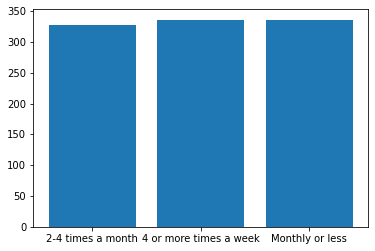

In [7]:
plt.bar(mybars.index, mybars.values);

This is a overall bar chart for question `audit_c_1`. Given the unifrom distribution assumption within my `SurveyResponseGenerator.py`, this is type of distribution is exactly what I expected.

If we want to study the relationship between `Age_Group` and `audit_c_1`, we can create a contingency table and test their correlations.

In [8]:
data['audit_c_1'] = data['audit_c_1'].astype('category')
data['audit_c_1'] = data['audit_c_1'].cat.reorder_categories(['4 or more times a week',
                                                              '2-4 times a month',
                                                              'Monthly or less'])
(pandas.crosstab(data.Age_Group, data.audit_c_1, normalize='index')*100).round(2)

audit_c_1           4 or more times a week  2-4 times a month  Monthly or less
Age_Group                                                                     
12-17 years old                      29.45              30.82            39.73
18-24 years old.                     30.00              39.17            30.83
25-34 years old.                     38.89              30.56            30.56
35-44 years old                      29.45              33.56            36.99
45-54 years old.                     42.18              30.61            27.21
55-64 years old.                     29.73              35.81            34.46
Under 12 years old                   34.90              30.20            34.90

In [9]:
crosstab = pandas.crosstab(data.Age_Group, data.audit_c_1)
stats.chi2_contingency(crosstab.values)

(14.637226001006434,
 0.26187737375943865,
 12,
 array([[49.056, 47.888, 49.056],
        [40.32 , 39.36 , 40.32 ],
        [48.384, 47.232, 48.384],
        [49.056, 47.888, 49.056],
        [49.392, 48.216, 49.392],
        [49.728, 48.544, 49.728],
        [50.064, 48.872, 50.064]]))

The p-value is the second value listed, 0.2619, which is greater than .05. The p-value represents the probability that a cross-tab with row-by-row (or column-by-column) differences as extreme as the ones we see can be generated by a random sample if we assume that these two features are independent in the population so that the row percents should be constant across rows (and column percents should be constant across columns). Because the p-value relatively large, we failed to reject this null hypothesis and conclude that there is a not enough evidence to prove a statistically significant relationship between `Age Group` and `audit_c_1`.

### Requirement 3: Stratified metrics 

In [10]:
data[['Race', 'Gender', 'audit_c_1']].groupby(['Race', 'Gender']).count()

audit_c_1
Race                                      Gender           
American Indian or Alaska Native          Female         86
                                          Male           89
Asian                                     Female        115
                                          Male           89
Black or African American                 Female        109
                                          Male          102
Hispanic or Latino                        Female        111
                                          Male           90
Native Hawaiian or Other Pacific Islander Female        102
                                          Male          107

In [11]:
data[['Gender', 'Age_Group', 'audit_c_1']].groupby(['Gender', 'Age_Group']).count()

audit_c_1
Gender Age_Group                    
Female 12-17 years old            75
       18-24 years old.           72
       25-34 years old.           77
       35-44 years old            70
       45-54 years old.           80
       55-64 years old.           67
       Under 12 years old         82
Male   12-17 years old            71
       18-24 years old.           48
       25-34 years old.           67
       35-44 years old            76
       45-54 years old.           67
       55-64 years old.           81
       Under 12 years old         67

Once we have received the real data from our research partner, we can easily develop metrics using the `groupby` and different aggregation function to further study the different metrics. 

### Future Improvement
- If more time was permitted, I can give a more detailed analysis for more questions.
- If more time was permitted, I will also conduct a correspondence analysis for some similar questions. 
- I can also create better visualization to help research partners to better understand the data.

### Correspondance Analysis 
- Date: 11/16/2020